<a href="https://colab.research.google.com/github/earendil94/SMLExam/blob/master/SML_Project_Claudia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STATISTICAL MACHINE LEARNING**

ARRIGHI Leonardo, BRAND Francesco, DORIGO Claudia


Dataset folder is saved in "/content/drive/My Drive/SML/SML_Project".

In [1]:
# link colab and drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# then follow passages

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import pandas as pd
import os
import torchvision
from torchvision import transforms
from IPython import display

from PIL import Image
import glob

torch.manual_seed(160898)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device: {}'.format(device))

Device: cuda:0


In [ ]:
csv = '/content/drive/My Drive/SML/SML_Project/Chunk1/results.csv'
imgs = '/content/drive/My Drive/SML/SML_Project/Chunk1/img1_200/'

In [ ]:
# Load csv
df = pd.read_csv(csv, delimiter='|') 
print(df.shape)
print(df.columns[2], df.columns[2] == ' comment') 
df[' comment'].values[0]
df.head(6)

(158915, 3)
 comment True


,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
5,10002456.jpg,0,Several men in hard hats are operating a gian...


In [ ]:
# given the image folder
def image_preprocessing(image_folder):
  path = os.path.join(image_folder,'*.jpg')
  names = []
  images = []
  transform = transforms.Compose([transforms.Resize(256),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                                 ])
  for filename in glob.glob(path):
    im=Image.open(filename)
    names.append(filename[56:].split('.')[0])
    a=transform(im)
    #print(a)
    images.append(a)

  #images_df = pd.DataFrame(images,index=names, columns=['image'])
  images_ls = [names,images]
  return images_ls

images = image_preprocessing('/content/drive/My Drive/SML/SML_Project/Chunk1/img1_200/')
#images

#import csv
#with open('/content/drive/My Drive/SML/SML_Project/Chunk1/images.csv', 'w') as f:
#    writer = csv.writer(f)
#    writer.writerows(zip(images[0], images[1]))



     


In [5]:
# FUNCTION TO BUILD THE DICTIONARY

import shelve

def build_img_shelve(img_folder,shelve_path):
  path = os.path.join(img_folder,'*.jpg')
  transform = transforms.Compose([transforms.Resize(256),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                                  ])
  counter = 0
  with shelve.open(shelve_path) as d:
    counter = couter + 1
    for i in glob.glob(path):
      if (counter%1000)==0:
        print(counter)
      im=Image.open(i)
      d[i[len(img_folder):].split('.')[0]]=transform(im)

  
imgs = '/content/drive/My Drive/SML/SML_Project/Chunk1/img1_200/'
build_img_shelve(imgs,'/content/drive/My Drive/SML/SML_Project/Chunk1/img_shelve')

/usr/local/lib/python3.6/dist-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


In [12]:
# HOW TO RETRIEVE A SET OF PROCESSED IMAGES

chunk_img = []
for i in glob.glob('/content/drive/My Drive/SML/SML_Project/Chunk1/img1_200/*.jpg'):
  chunk_img.append(i[len('/content/drive/My Drive/SML/SML_Project/Chunk1/img1_200/'):].split('.')[0])

#print(chunk_img)
with shelve.open('/content/drive/My Drive/SML/SML_Project/Chunk1/img_shelve') as d:
  for i in chunk_img:
    print(d[i])

tensor([[[-0.9192, -0.8849, -0.9192,  ..., -1.0733, -1.0904, -0.9705],
         [-1.0219, -1.0048, -0.9877,  ..., -1.1247, -1.1760, -1.0733],
         [-1.0048, -1.0048, -1.0219,  ..., -1.2617, -1.2445, -1.2617],
         ...,
         [-0.7137, -0.7479, -0.7822,  ...,  1.3070,  1.2557,  1.1700],
         [ 0.2624, -0.3369, -0.6623,  ...,  1.3584,  1.4612,  1.4098],
         [ 1.3413,  0.9132,  0.1768,  ...,  1.4269,  1.5468,  1.4954]],

        [[-0.5126, -0.5126, -0.5651,  ..., -0.8277, -0.8627, -0.7227],
         [-0.6352, -0.6877, -0.6352,  ..., -0.8277, -0.8803, -0.7752],
         [-0.6352, -0.6702, -0.6527,  ..., -0.9503, -0.9503, -0.9853],
         ...,
         [-0.3200, -0.3200, -0.3725,  ...,  1.4832,  1.4307,  1.3431],
         [ 0.5728,  0.0126, -0.2675,  ...,  1.5357,  1.6408,  1.5882],
         [ 1.5707,  1.1506,  0.5203,  ...,  1.6057,  1.7283,  1.6758]],

        [[-0.1138, -0.0964, -0.1661,  ..., -0.5844, -0.6018, -0.4624],
         [-0.2532, -0.2881, -0.2707,  ..., -0

In [ ]:
# encoder CNN from towardsdatascience
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        resnet = models.resnet152(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad_(False)
        
        modules = list(resnet.children())[:-1] # this removes the last layer
        self.resnet = nn.Sequential(*modules)
        self.embed = nn.Linear(resnet.fc.in_features, embed_size)

    def forward(self, images):
        features = self.resnet(images)
        features = features.view(features.size(0), -1)
        features = self.embed(features)
        return features

In [ ]:
# download the pretrained ResNet152 and look at the summary using torchsummary module
pretrained_ResNet = torch.hub.load('pytorch/vision:v0.6.0', 'resnet152', pretrained=True)
#load model on gpu
if torch.cuda.is_available():
  pretrained_ResNet.to('cuda')

from torchsummary import summary
#summary(pretrained_ResNet,(3,224,224))

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
# model wants in input a 4-d tensor, first dimension number of inputs
# if single element use input_image = image.unsqueeze(0)
data = torch.stack(input_images,0)
print(data.shape)

#model is already on gpu, I need to move also data
if torch.cuda.is_available():
    data = data.to('cuda')
  
pretrained_ResNet.eval() # tells all layers to work in eval mode
with torch.no_grad(): # speed up computation and reduce memory usage 
    output = pretrained_ResNet(data)

# scores over 1000 classes
#print(output[0])
# from values to probabilities using softmax
class_probs = torch.nn.functional.softmax(output[0], dim=0)
#print(class_probs)
# probabilities so sum up to 1
print(sum(class_probs))


torch.Size([200, 3, 224, 224])
tensor(1.0000, device='cuda:0')


bow
trench_coat
tank
half_track
stretcher
projectile
bulletproof_vest
rifle
assault_rifle
military_uniform


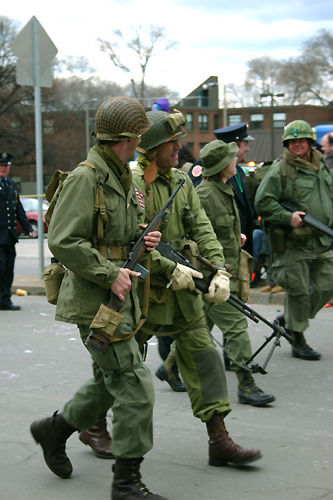

In [ ]:
# check how classification works for one image
# no needed for our project but I can see if some features are well captured
import json
class_idx = json.load(open("/content/drive/My Drive/SML/SML_Project/classes.json"))
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

# sort wrt probability and take 10 more probable indexes
for idx in output[20].sort()[1][-10:]:
    print(idx2label[idx])

images[20]

In [ ]:
# Now I should remove last layer of the ResNet
# to do that I replace it with identity
pretrained_ResNet.fc = nn.Identity()
#summary(pretrained_ResNet,(3,224,224))

#I'm not sure if I have to remove other layers or if I have to add a new one...


NameError: ignored